# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


Имея в своем распоряжении датасет, со всеми необходимыми для анализа данными проведем свое исследование по стандартому шаблону. \
-Для начала импортируем необходиые библиотеки.\
-Ознакомимся с данными в датасете, что бы составить первое представление о его составе и необходимой предобработке данных.\
-Проведем необходимую предобработку данных.\
-Проанализируем и визуализируем все имеющиеся зависимости.\
-Проведем некоторые вычисления, способные рассказать нам больше о важнейших скрытых закономерностях и особенностях предмета исследования.\
-Подведем итоги


### Откройте файл с данными и изучите общую информацию. 

Для начала, импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Читаем csv, используя оба источника на случай технических неисправностей. \
Сохраняем файл в стандартную переменную.

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

Ознакамливаемся с данными и сразу же выводим основные характеристики csv файла

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Для наглядности исходных данных выведем гистограммы столбцов датафрейма.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

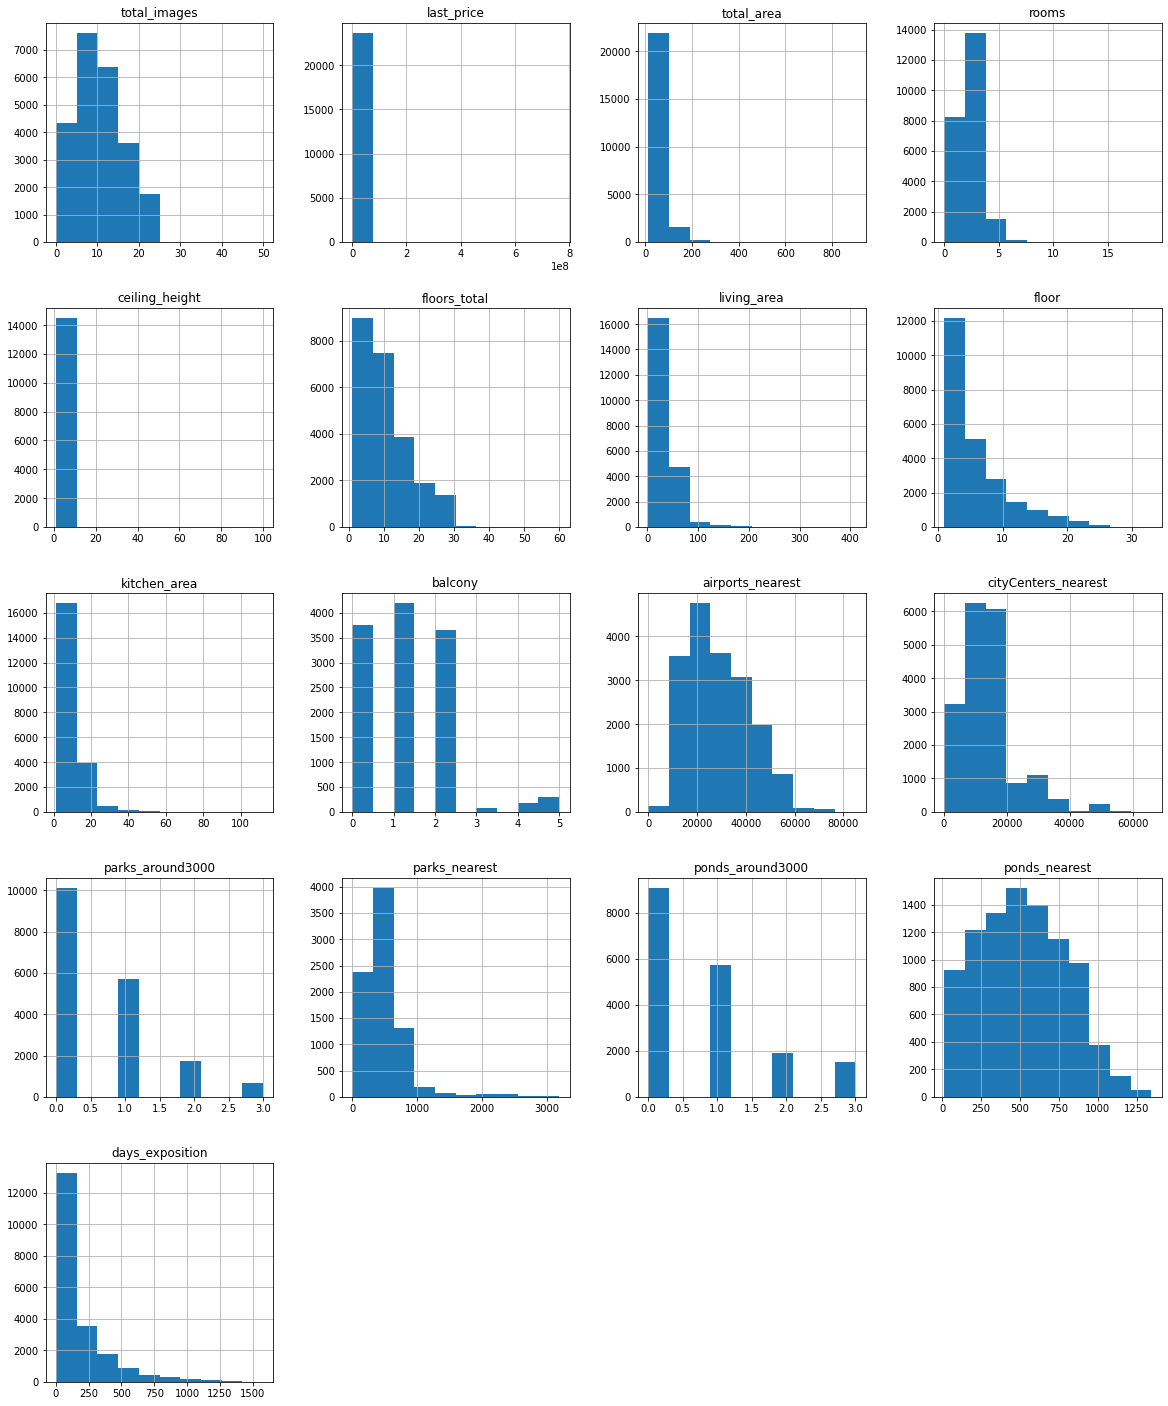

In [6]:
data.hist(figsize=(20, 25))

Гистограммы исходных (не предобработанных) значений указывают на большое кол-во пропусков, неточностей и выбросов (случайных значений)

### Предобработка данных

Начнем предобратотку данных с корректировки названий столбцов согласно "правилам хорошего тона"

In [7]:
data.columns.unique

<bound method Index.unique of Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')>

In [8]:
data = data.rename(
columns={ 
    'total_images' : 'total_images',
    'last_price' : 'last_price',
    'total_area' : 'total_area',
    'first_day_exposition' : 'first_day_exposition',
    'rooms' : 'rooms',
    'ceiling_height' : 'ceiling_height',
    'floors_total' : 'floors_total',
    'living_area' : 'living_area',
    'floor' : 'floor',
    'is_apartment': 'is_apartment',
    'studio': 'studio',
    'open_plan' : 'open_plan',
    'kitchen_area' : 'kitchen_area',
    'balcony' : 'balcony',
    'locality_name' : 'locality_name',
    'airports_nearest' : 'airports_nearest',
    'cityCenters_nearest' : 'city_centers_nearest',
    'parks_around3000' : 'parks_around_3000',
    'parks_nearest' : 'parks_nearest',
    'ponds_around3000' : 'ponds_around_3000',
    'ponds_nearest' : 'ponds_nearest',
    'days_exposition' : 'days_exposition'
 } 
)

Проверяем новые названия столбцов.

In [9]:
data.columns.unique

<bound method Index.unique of Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')>

Подсчитываем количество пропущенных значений.

In [10]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Наблюдаем пропущенные значения во многих столбцах. \
Можем предположить, что пользователи оставляли пропуски в столбцах обозначающих отсутствующие (кол-во балконов) или неизвестные им значения (высоту потолков, точные параметры кухни и жилой площади). \
Пропуски в параметре "апартаменты" могут указывать, что объект не является апартаментами. \
Пропуски в картографических данных, с наибольшей вероятностью, вызваны техническими ошибками, например: местоопределения (не значащийся на карте водоем/парк), невозможность однозначно определить расстояния до аэропорта/центра города.

Приведем значения стобца **locality_name** к общему виду без обозначений типа населенного пунка (деревня, поселок, село, и тд)

In [11]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

В столбце **ceiling_height** можем заменить случайные значения на нормальные .

In [12]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [13]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] >= 20, other=(data['ceiling_height'] / 10))

Было проведено исследование всех столбцов датафрейма на аномальные значения. \
Во избежание нагромождения ненужного кода, ниже преведены только операции со столбцами над которыми проводились какие-либо манипуляции. \
Так же в коде не будут указываться проведенные команды для проверки удаления/изменения значений.

В столбце **rooms** были обнаружены аномальные значения кол-ва комнат.
Удалим строки с значением больше 10 комнат.
Так мы потеряем всего несколько строк, при этом сильно улучшим статистические показатели.

In [14]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [15]:
data = data.loc[data['rooms'] < 10]

Удалим значения этажей выше 28

In [16]:
data = data.loc[data['floors_total'] < 29]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23569 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23569 non-null  int64  
 1   last_price            23569 non-null  float64
 2   total_area            23569 non-null  float64
 3   first_day_exposition  23569 non-null  object 
 4   rooms                 23569 non-null  int64  
 5   ceiling_height        14471 non-null  float64
 6   floors_total          23569 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23569 non-null  int64  
 9   is_apartment          2771 non-null   object 
 10  studio                23569 non-null  bool   
 11  open_plan             23569 non-null  bool   
 12  kitchen_area          21341 non-null  float64
 13  balcony               12111 non-null  float64
 14  locality_name         23521 non-null  object 
 15  airports_nearest   

В столбце **is_apartment** заменим пропуски на False. Логически, можно предположить, что они означают, что объект не является апартаментами

In [18]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Можем предположить, что пропуск в столбцах **balcony** , **ponds_around_3000** означает отсутствие объекта. \
Тем не менее заполнять эти пропуски чем-либо не представляется целесообразным во избежание искажения данных.

In [19]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9098
floors_total                0
living_area              1869
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2228
balcony                 11458
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around_3000        5508
parks_nearest           15535
ponds_around_3000        5508
ponds_nearest           14546
days_exposition          3163
dtype: int64

Учитывая то, что перед нами стоит аналитическая задача, мы удалили максимально возможное кол-во пропусков, не искажая точность исследования, при этом не сильно уменьшая выборку. \
Дальнейшие удаления/замена другими значениями приведет к искажению точности исследования, было решено оставить их "как есть".

Далее меняем форматы данных в столбцах датафрейма. \
Стоит упомянуть, что изменение форматов данных, не считая столбец "время", выполняется по нескольким причинам: 
- Эстетический аспект 
- Экономия памяти 
- Точность исполнения логических операций (например: жесткое сравнение) 
- Просто потому, что они обозначают целые величины и дробные части им не нужны )

In [20]:
data = data.drop_duplicates().reset_index(drop=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23569 entries, 0 to 23568
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23569 non-null  int64  
 1   last_price            23569 non-null  float64
 2   total_area            23569 non-null  float64
 3   first_day_exposition  23569 non-null  object 
 4   rooms                 23569 non-null  int64  
 5   ceiling_height        14471 non-null  float64
 6   floors_total          23569 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23569 non-null  int64  
 9   is_apartment          23569 non-null  bool   
 10  studio                23569 non-null  bool   
 11  open_plan             23569 non-null  bool   
 12  kitchen_area          21341 non-null  float64
 13  balcony               12111 non-null  float64
 14  locality_name         23521 non-null  object 
 15  airports_nearest   

Начнем с формата времени.

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

Далее переходим к столбцам:

In [23]:
data['floors_total'] = data['floors_total'].astype('Int64')

In [24]:
data['balcony'] = data['balcony'].astype('Int64')

In [25]:
data['airports_nearest'] = data['airports_nearest'].astype({'airports_nearest': "Int64"})

In [26]:
data['city_centers_nearest'] = data['city_centers_nearest'].astype({'city_centers_nearest': "Int64"})

In [27]:
data['parks_around_3000'] = data['parks_around_3000'].astype({'parks_around_3000': "Int64"})

In [28]:
data['parks_nearest'] = data['parks_nearest'].astype({'parks_nearest': "Int64"})

In [29]:
data['ponds_around_3000'] = data['ponds_around_3000'].astype({'ponds_around_3000': "Int64"})

In [30]:
data['ponds_nearest'] = data['ponds_nearest'].astype({'ponds_nearest': "Int64"})

In [31]:
data['days_exposition'] = data['days_exposition'].round().astype({'days_exposition': "Int64"})

Проверяем результат выполнения предыдущих шагов по изменению формата данных.

In [32]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          Int64
locality_name                   object
airports_nearest                 Int64
city_centers_nearest             Int64
parks_around_3000                Int64
parks_nearest                    Int64
ponds_around_3000                Int64
ponds_nearest                    Int64
days_exposition                  Int64
dtype: object

Отобразим статистическую информацию о датафрейме

In [33]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23569.000000,2.356900e+04,23569.000000,23569.00000,14471.000000,23569.000000,21700.000000,23569.000000,21341.000000,12111.000000,18037.000000,18060.000000,18061.000000,8034.000000,18061.000000,9023.000000,20406.000000
mean,9.872078,6.512701e+06,60.204376,2.06657,0.317274,10.639781,34.376217,5.861174,10.544831,1.153579,28804.579919,14178.006035,0.612037,490.512074,0.766181,519.795744,180.844458
std,5.681998,1.055854e+07,34.825705,1.05143,1.289977,6.529470,21.545602,4.843957,5.826914,1.070910,12628.517803,8613.520864,0.802217,341.498399,0.935328,277.237092,219.584610
min,0.000000,1.219000e+04,12.000000,0.00000,0.100000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.00000,0.251000,5.000000,18.600000,2.000000,7.000000,0.000000,18557.000000,9233.000000,0.000000,288.000000,0.000000,296.000000,45.000000
50%,9.000000,4.635000e+06,52.000000,2.00000,0.265000,9.000000,30.000000,4.000000,9.100000,1.000000,26764.000000,13083.500000,0.000000,455.000000,0.000000,504.000000,95.000000
75%,14.000000,6.763392e+06,69.700000,3.00000,0.280000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16270.000000,1.000000,612.000000,1.000000,732.000000,232.000000
max,50.000000,7.630000e+08,631.200000,9.00000,100.000000,28.000000,347.500000,27.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Посчитайте и добавьте в таблицу новые столбцы

Добавляем в таблицу нужные столбцы согласно заданию, они понадобятся для выполнения дальнеших шагов исследования. \
P.S. При округлении значений столбца **расстояние до центра** произошол баг библиотеки, который не позволил правильно округлить значения. В результате чего, округление было выполнено грубо.

In [34]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,0.270,16,51.00,8,False,...,25.00,<NA>,санкт-петербург,18863,16028,1,482,2,755,<NA>
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,11.00,2,поселок шушары,12817,18603,0,<NA>,0,<NA>,81
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,8.30,0,санкт-петербург,21741,13933,1,90,2,574,558
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,санкт-петербург,28098,6800,2,84,3,234,424
4,2,10000000.0,100.00,2018-06-19,2,0.303,14,32.00,13,False,...,41.00,<NA>,санкт-петербург,31856,8098,2,112,1,48,121
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,9.10,<NA>,городской поселок янино-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,55
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,14.40,1,поселок парголово,52996,19143,0,<NA>,0,<NA>,155
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,18.90,2,санкт-петербург,23982,11634,0,<NA>,0,<NA>,<NA>
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,8.81,<NA>,поселок мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,189
9,18,5400000.0,61.00,2017-02-26,3,0.250,9,43.60,7,False,...,6.50,2,санкт-петербург,50898,15008,0,<NA>,0,<NA>,289


In [35]:
data['meter_price'] = (data['last_price'] / data['total_area']).round()
data['meter_price'].astype({'meter_price': "Int64"})

0        120370
1         82921
2         92786
3        408176
4        100000
          ...  
23564     72491
23565     52542
23566     44092
23567    149511
23568     41796
Name: meter_price, Length: 23569, dtype: Int64

In [36]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [37]:
data['month'] = data['first_day_exposition'].dt.month_name()

In [38]:
data['year'] = data['first_day_exposition'].dt.year

In [39]:
def floor_typer (row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return pd.NA
    
data['floor_type'] = data.apply(floor_typer, axis=1)

In [40]:
data['distance_km'] = (data['city_centers_nearest'] / 1000).astype('Int64')


In [41]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,weekday,month,year,floor_type,distance_km
0,20,13000000.0,108.00,2019-03-07,3,0.270,16,51.00,8,False,...,482,2,755,<NA>,120370.0,3,March,2019,другой,16
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,<NA>,0,<NA>,81,82921.0,1,December,2018,первый,18
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,90,2,574,558,92786.0,3,August,2015,другой,13
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,84,3,234,424,408176.0,4,July,2015,другой,6
4,2,10000000.0,100.00,2018-06-19,2,0.303,14,32.00,13,False,...,112,1,48,121,100000.0,1,June,2018,другой,8
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,<NA>,<NA>,<NA>,55,95066.0,0,September,2018,другой,<NA>
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,<NA>,0,<NA>,155,99196.0,3,November,2017,другой,19
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,<NA>,0,<NA>,<NA>,110545.0,3,April,2019,другой,11
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,<NA>,<NA>,<NA>,189,87455.0,2,May,2018,другой,<NA>
9,18,5400000.0,61.00,2017-02-26,3,0.250,9,43.60,7,False,...,<NA>,0,<NA>,289,88525.0,6,February,2017,другой,15


### Проведите исследовательский анализ данных

array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'weekday'}>]], dtype=object)

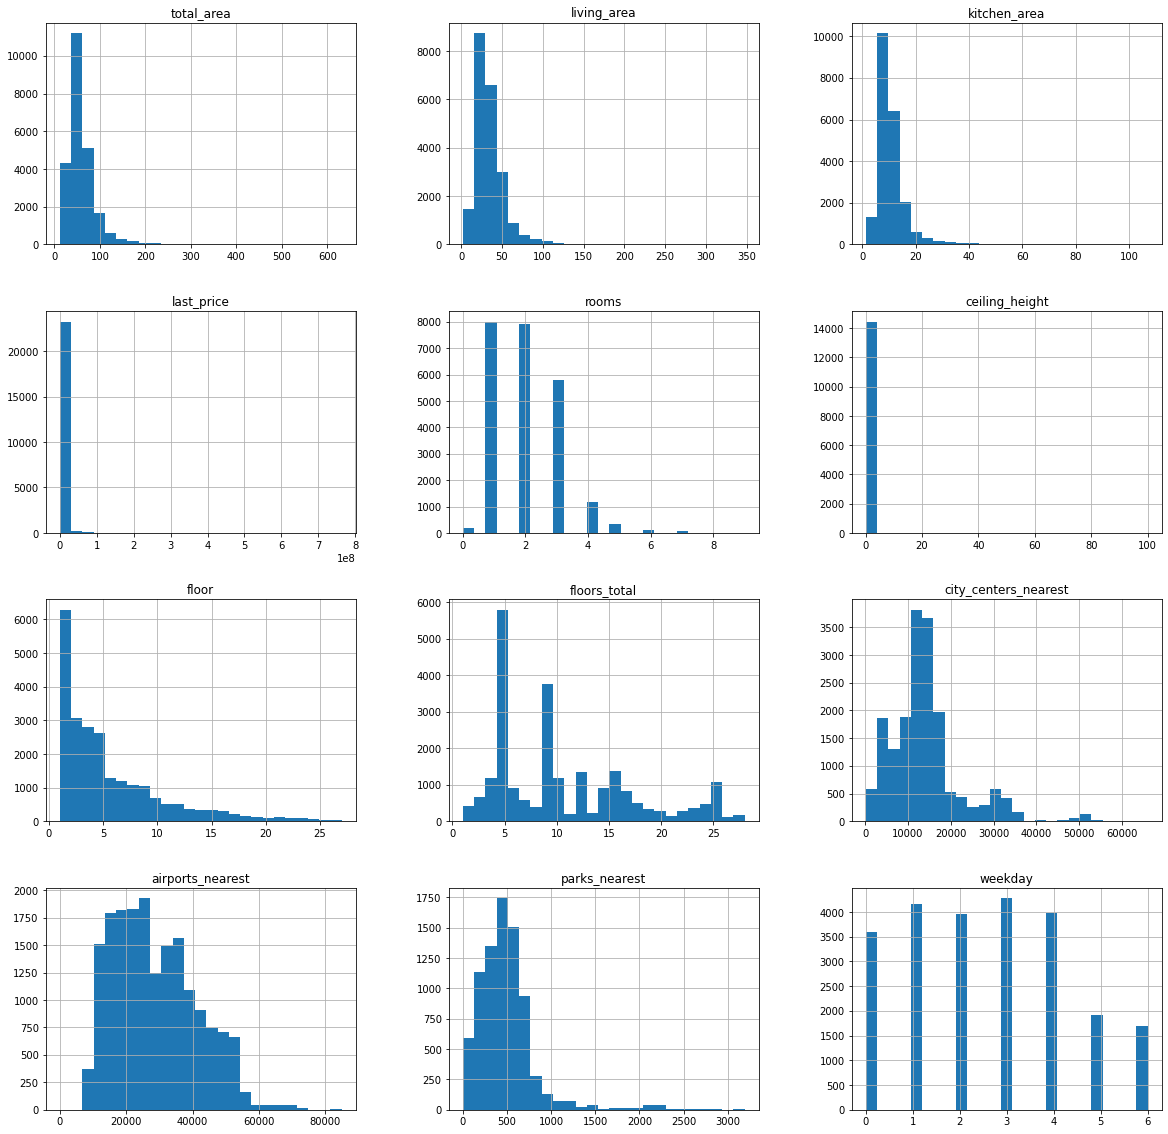

In [42]:
data.hist(column=['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floor_type', \
                  'floors_total', 'city_centers_nearest', 'airports_nearest', 'parks_nearest', 'weekday'], figsize=(20, 20), bins=25)

<AxesSubplot:xlabel='month'>

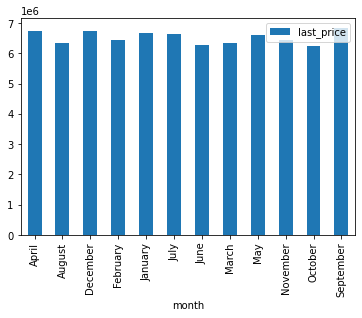

In [43]:
data.pivot_table(index='month', values='last_price', aggfunc='mean').plot.bar()

<AxesSubplot:xlabel='floor_type'>

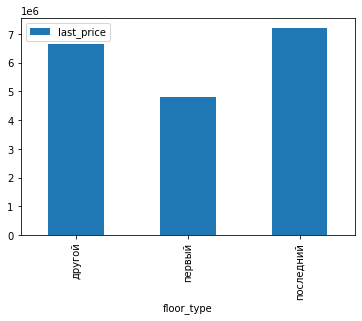

In [44]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot.bar()

По гистограммам столбцов мы наблюдаем, что подавляющее большинство недвижимости обладает жилой площадью в районе 50 кв.м. и суммарной площадью в 100-400 кв.м. Скорее всего - это частные дома/коттеджи. \
Площадь кухни в большинстве случаев в районе 20 кв.м. \
Медианное значение цены составляет 4,7 млн руб. Стоит упомянуть, что цена имеет значительный разброс, скорректированное стандартное отклонение выборки равняется 9. \
Медианная стоимость жильня не сильно зависит от месяца подачи объявления. (от 6,2 до 6,8) млн.\
Кол-во комнат в подавляющим большинстве случаев -1,2,3 комнаты. Реже встречаются варианты с 4,5 комнатами. Большее кол-во комнат является достаточно редким явлением. \
Стандартная высота потолкоа - 2,7 м. Высота потолков различается в зависимости от времени постройки здания. Недвижимость в историческом центре имеет высоту потолков выше, чем новостройках. \
Подавляющее большинство недвижимости находится на 1 этаже и плавно уменьшается согласно распределению Пуассона по мере повышения этажа. \
Стоимость жилья меньше всего на 1-м этаже с медианой в 4,7 млн, за ним идет последний этаж, медиана 6,8. Дороже всего недвижимость на остальных этажах ( не 1-й и не последний) с медианным значением более 7 млн. \
Таже по гистограммам заметны типовые в плане этажности объекты - это знакомые нам 5, 9, 12, 16 и 26 этажные многоквартирные строения. Чаще всего встречаются 5 и 9 этажные. \
Типичная удаленность от центра составляет 10 - 18 км. Так же замечаем пик в рацоне 50 км, это не случайное значение, вероятнее всего это загородные поселки. \
Удаленность от аэропорта в большинстве случаев 10 - 55 км. \
А вот парки распологаются куда ближе, до 1 км в большинстве случаев. \
Касаемо дня публикации объявлений все просто - в среднем по будням рынок недвижимости в 2 раза активнее, чем в выходные дни.

<AxesSubplot:>

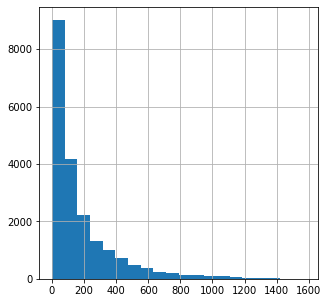

In [45]:
data['days_exposition'].hist(bins=20, figsize=(5,5))

In [46]:
data['days_exposition'].describe()

count    20406.000000
mean       180.844458
std        219.584610
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Время продажи квартир соответствуют распределению Пуассона и варьируются от 0 до 1580 дней. \
Медианное время продажи объекта 102, среднее 185 дней. Большинство объектов (75%) продалось за 239 дней. \
Быстрыми можно считать продажи менее, чем за 45 дней, средними от45 до 239, необычно долгими продажи занявшие от 239 и более дней

Рассчитаем факторы, в наибольшей степени влияющие на общую стоимость объекта.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

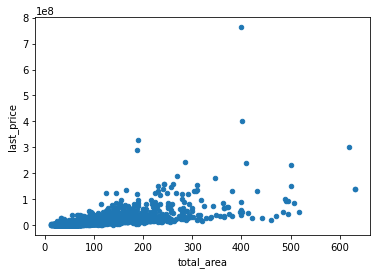

In [47]:
data.plot(x='total_area', y='last_price', kind='scatter') 

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

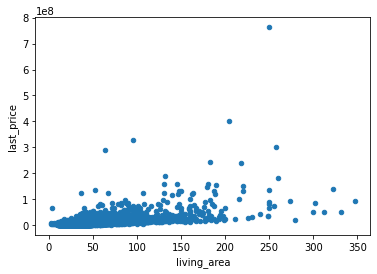

In [48]:
data.plot(x='living_area', y='last_price', kind='scatter')

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

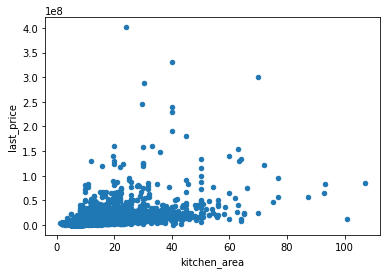

In [49]:
data.plot(x='kitchen_area', y='last_price', kind='scatter')

Как и ожидалось, стоимость объекта растет при увеличении его общей площади, жилой площади и площади кухни, однако, увеличивающиеся рассеивание на диаграмме говорит о том, что имеются и другие факторы, оказывающее серьезное влияние на общую стоимость объекта, помимо площади.

<AxesSubplot:xlabel='rooms'>

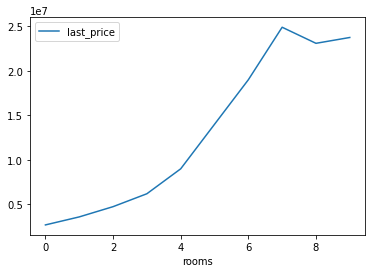

In [50]:
pd.pivot_table(data,index='rooms', values='last_price', aggfunc='median').plot()

Касаемо кол-ва комнат, можно сделать логичный вывод о том, что по мере увеличения комнат, растет и стоимость объекта.

<AxesSubplot:xlabel='floor_type'>

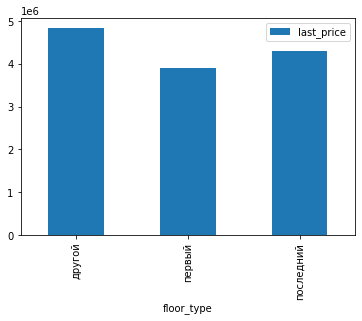

In [51]:
pd.pivot_table(data,index='floor_type', values='last_price', aggfunc='median').plot(kind='bar')

Дешевле всего обходятся объекты на первом этаже. Медианное значение такого жилья ~ 4 млн. \
За ним следют объекты на последних этажах с медианой в ~4,6 млн. \
Дороже всего обходятся квартиры на этажах между первым и последним с медианой ~4,9

<AxesSubplot:xlabel='weekday'>

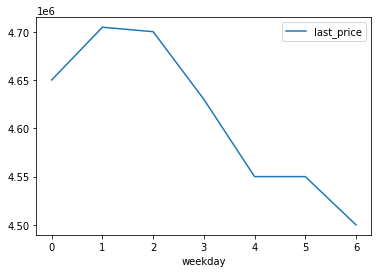

In [52]:
pd.pivot_table(data,index='weekday', values='last_price', aggfunc='median').plot()

Наибольшая стоимость приходится на середину недели, наименьшая на выходные.

<AxesSubplot:xlabel='month'>

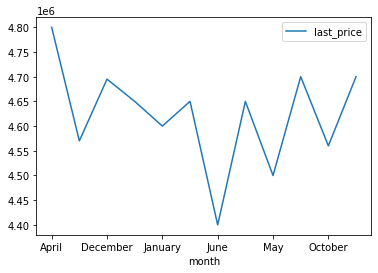

In [53]:
pd.pivot_table(data,index='month', values='last_price', aggfunc='median').plot()

В декабре недвижимость стоит наибольшего кол-ва средств в районе 4,85. Дешевле всего в июне, около 4,5 млн.

<AxesSubplot:xlabel='year'>

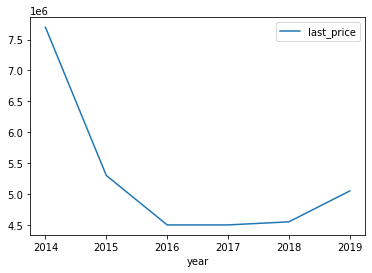

In [54]:
pd.pivot_table(data,index='year', values='last_price', aggfunc='median').plot()

Наблюдаем значительное (почти в 2 раза) снижение цен в 2016, 2017 годах. Возможно произошел спад рынка недвижимости. В 2018 происходит коррекция и дальнейшее движение цен вверх.

<AxesSubplot:xlabel='balcony'>

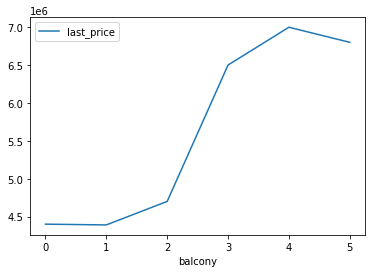

In [55]:
pd.pivot_table(data,index='balcony', values='last_price', aggfunc='median').plot()

Наличие балконов значительно увеличивает итоговую стоимость. Особенно, когда кол-во балконов от 2-х до 4-х

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [56]:
top_ten = data['locality_name'].value_counts(ascending = False)
top_ten =  top_ten.head(10).index.to_list()
filtred_local_name = data[data['locality_name'].isin(top_ten)]
top_ten_city_price= filtred_local_name.pivot_table(index = 'locality_name', values = 'meter_price')
top_ten_city_price.sort_values(by='meter_price', ascending = False)

,meter_price
locality_name,
санкт-петербург,114857.308091
пушкин,103125.818428
деревня кудрово,92473.588629
поселок парголово,90161.374233
поселок мурино,85629.567029
поселок шушары,78551.359909
колпино,75424.571006
гатчина,68746.110749
всеволожск,68654.474874


Среди 10 населенных пунктов с самой высокой средней ценой за кв. м. как и ожидалось, лидирует Санкт-Петербург - 114857 руб. \
Замыкает топ-10 Выборг со средней ценой в 58141 руб за кв. м. 

Рассчитаем изменение цены каждого километра по мере удаления от центра города для Сенкт-Петербурга

<AxesSubplot:xlabel='distance_km'>

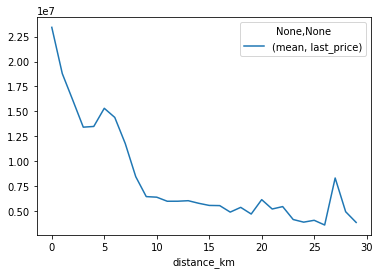

In [57]:
km_price = data[data['locality_name'] == 'санкт-петербург'] \
.pivot_table(index='distance_km', values=['last_price'], aggfunc=['mean'])
km_price.plot()

Стоимость одного километра, ожидаемо, снижается по мере удаления от центра города. При этом скорость (крутизна) снижения больше в пределах 10 км от центра, при расстоянии свыше 10 км снижение происходит заметно "плавнее". \
Резкое увеличение стоимости в районе 26 - 28 км, возможно, говорит о наличии какого-то элитного загородного поселка с высокой стоимостью жилья.

### Общий вывод

В ходе исследования, выяснилось, что наибольшее значение на общую стоимость объекта недвижимости оказывают:
- Кол-во комнат. Больше комнат - выше стоимость.
- Удаление от центра. Чем дальше находится объект от центра города, тем ниже стоимость. Значительнее всего цена падает в пределах 10 км., далее 10 км снижение цены менее существенное. 
- Значительное влияние оказывал год публикации объявления. В 2016 и 2017 произошло существенное (почти в 2 раза) снижение стоимости жилья. В последующем произошла коррекция цены вверх. 
- Общая площадь объекта, ожидаемо, оказывает большое влияние на его конечную стоимость. Но учитываю разброс значений, общая площадь играет большую роль в купе с др факторами .
- Важным фактором является локация объекта. В небольших, отдаленных от Санкт-Петербурга населенных пункат жилье дешевле, чем в историческом центре города.
- Наличие балконов значительно увеличивает итоговую стоимость. Особенно, когда кол-во балконов от 2-х до 4-х. При других значениях влияние не такое сильное. \
- Стоимость жилья меньше всего на 1-м этаже с медианой в 4,7 млн, за ним идет последний этаж, медиана 6,8. Дороже всего недвижимость на остальных этажах ( не 1-й и не последний) с медианным значением более 7 млн.
- Стоимость жилья меньше всего на 1-м этаже с медианой в 4,7 млн, за ним идет последний этаж, медиана 6,8. Дороже всего недвижимость на остальных этажах ( не 1-й и не последний) с медианным значением более 7 млн.\
\
Менее значимыми факторами, влияющими на общую стоимость являются:
- Медианная стоимость жильня не сильно зависит от месяца подачи объявления. (от 6,2 до 6,8) млн. При отсутствии честкой взаимосвязи между месяцем публикации и итоговой ценой.\
- Тип этажа объекта. Первый этаж дешевле всего, за ним следует последний этаж. Дороже всего обходится недвижимость на этажах между ними (любой другой этаж)
- Медианная стоимость жильня не сильно зависит от месяца подачи объявления. (от 6,2 до 6,8) млн. При этом отсутвует какая-либо закономерность медианы стоимости от месяца публикации объявления.\
- Площадь кухни и жилая площадь по отдельности оказывали не самое значительное влияние на цену обекта.
- День и месяц публикации обявления оказывали незначительное влияние на конечную стоимость. Разница с аналогичными обектами других дней/ месяцев публикации меньше 10%.\
Стоит отдельно упомянуть, что среди 10 населенных пунктов с самой высокой средней ценой за кв. м. как и ожидалось, лидирует Санкт-Петербург - 114857 руб.
Замыкает топ-10 Выборг со средней ценой в 58141 руб за кв. м.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод